In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('bitcoin_price_bitcoin_price.2013Apr-2017Aug (1).csv')
df

,Close,Date,Open,High,Low,Volume,Market Cap
0,2875.34,"Jul 31, 2017",2763.24,2889.62,2720.61,860575000,45535800000
1,2757.18,"Jul 30, 2017",2724.39,2758.53,2644.85,705943000,44890700000
2,2726.45,"Jul 29, 2017",2807.02,2808.76,2692.80,803746000,46246700000
3,2809.01,"Jul 28, 2017",2679.73,2897.45,2679.73,1380100000,44144400000
4,2671.78,"Jul 27, 2017",2538.71,2693.32,2529.34,789104000,41816500000
...,...,...,...,...,...,...,...
1551,105.21,"May 02, 2013",116.38,125.60,92.28,0,1292190000
1552,116.99,"May 01, 2013",139.00,139.89,107.72,0,1542820000
1553,139.00,"Apr 30, 2013",144.00,146.93,134.05,0,1597780000
1554,144.54,"Apr 29, 2013",134.44,147.49,134.00,0,1491160000


In [2]:
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df=df.dropna(axis=1)
print(df)

        Close       Date     Open     High      Low      Volume   Market Cap   
0     2875.34 2017-07-31  2763.24  2889.62  2720.61   860575000  45535800000  \
1     2757.18 2017-07-30  2724.39  2758.53  2644.85   705943000  44890700000   
2     2726.45 2017-07-29  2807.02  2808.76  2692.80   803746000  46246700000   
3     2809.01 2017-07-28  2679.73  2897.45  2679.73  1380100000  44144400000   
4     2671.78 2017-07-27  2538.71  2693.32  2529.34   789104000  41816500000   
...       ...        ...      ...      ...      ...         ...          ...   
1551   105.21 2013-05-02   116.38   125.60    92.28           0   1292190000   
1552   116.99 2013-05-01   139.00   139.89   107.72           0   1542820000   
1553   139.00 2013-04-30   144.00   146.93   134.05           0   1597780000   
1554   144.54 2013-04-29   134.44   147.49   134.00           0   1491160000   
1555   134.21 2013-04-28   135.30   135.98   132.10           0   1500520000   

      year  month  day  
0     2017    

In [3]:
data=df.drop(['Date'], axis=1)
print(data)
target=df['Close']
#print(target)

        Close     Open     High      Low      Volume   Market Cap  year   
0     2875.34  2763.24  2889.62  2720.61   860575000  45535800000  2017  \
1     2757.18  2724.39  2758.53  2644.85   705943000  44890700000  2017   
2     2726.45  2807.02  2808.76  2692.80   803746000  46246700000  2017   
3     2809.01  2679.73  2897.45  2679.73  1380100000  44144400000  2017   
4     2671.78  2538.71  2693.32  2529.34   789104000  41816500000  2017   
...       ...      ...      ...      ...         ...          ...   ...   
1551   105.21   116.38   125.60    92.28           0   1292190000  2013   
1552   116.99   139.00   139.89   107.72           0   1542820000  2013   
1553   139.00   144.00   146.93   134.05           0   1597780000  2013   
1554   144.54   134.44   147.49   134.00           0   1491160000  2013   
1555   134.21   135.30   135.98   132.10           0   1500520000  2013   

      month  day  
0         7   31  
1         7   30  
2         7   29  
3         7   28  
4   

**VISUALIZATION**

**SPLITING DATA INTO TRAIN AND TEST**

In [4]:
from sklearn.preprocessing import MinMaxScaler
# Scale the data
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(data[['Close']])
scaled_test_data = scaler.transform(data[['Close']])

In [5]:
from sklearn.model_selection  import train_test_split
Y = target
X = data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1167, 9) (389, 9) (1167,) (389,)


In [6]:
X_train=X_train.values
Y_train=Y_train.values
X_test=X_test.values
Y_test=Y_test.values

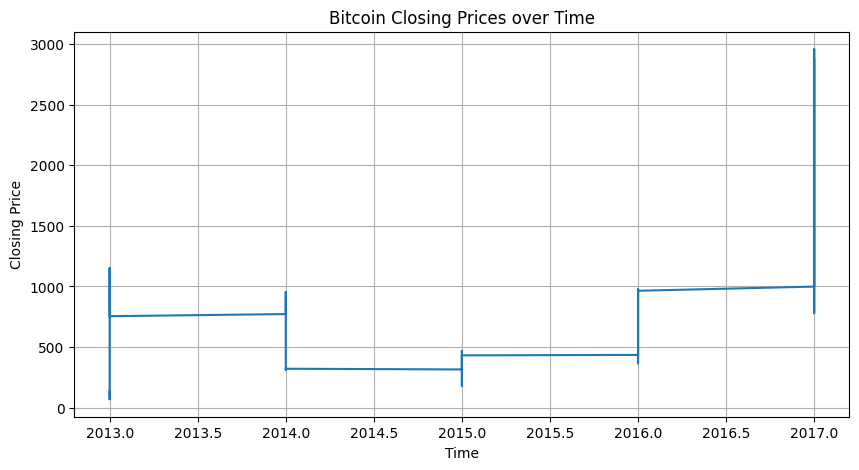

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot 1: Line chart of Bitcoin closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(data['year'], df['Close'])
plt.title('Bitcoin Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
# plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

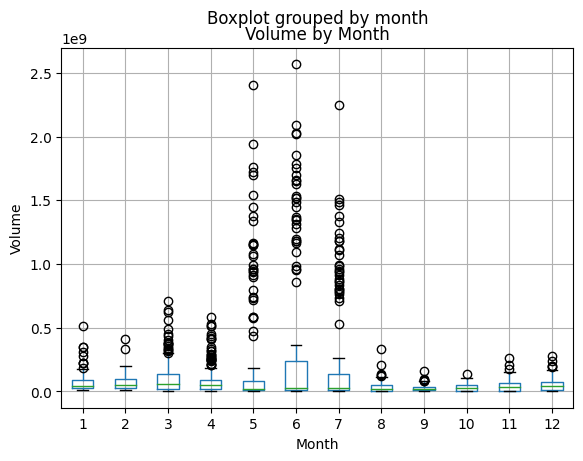

In [34]:
# Box plot of Bitcoin trading volume by month
plt.figure(figsize=(10, 5))
df.boxplot(column='Volume', by='month')
plt.title('Volume by Month')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

In [8]:
data.dtypes

Close         float64
Open          float64
High          float64
Low           float64
Volume          int64
Market Cap      int64
year            int32
month           int32
day             int32
dtype: object

**applying different models**

In [18]:
# LSTM model
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(np.expand_dims(scaled_train_data, axis=-1),
                              np.expand_dims(scaled_train_data, axis=-1),
                              epochs=10, batch_size=1, verbose=0)
lstm_predictions = lstm_model.predict(np.expand_dims(scaled_test_data, axis=-1))

49/49 [==============================] - 1s 2ms/step


In [19]:
from sklearn.metrics import mean_squared_error
lstm_rmse = np.sqrt(mean_squared_error(data['Close'], lstm_predictions))
print(lstm_rmse)

785.7064565461943


**1.DECISION TREE REGRESSOR WITH CROSS VALIDATION**

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)

print(cross_val_score(dtr, X_train, Y_train, cv=10),'\n')
print(cross_val_score(dtr, X_test, Y_test, cv=10))

[0.99983051 0.99887777 0.99932963 0.99958265 0.99976523 0.9987891
 0.9995091  0.99985829 0.99672765 0.99766776] 

[0.99843428 0.99937418 0.99851929 0.9967237  0.99835939 0.99728688
 0.99750906 0.99891347 0.99987587 0.99941078]


**2.RANDOM FOREST REGRESSOR**

In [20]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0,oob_score=True)
regr.fit(X_train, Y_train) #training the model
regr.predict(X_test)
print(regr.oob_score_)  # out of bag score

0.9989212857772984


**3.BAGGING REGRESSOR**

In [23]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(n_estimators=10, random_state=0,oob_score=True).fit(X_train,Y_train)
br.predict(X_test)
print(br.oob_score_)

0.9713093222183007


c:\Users\arya0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:1253: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


In [22]:
import pickle
pickle.dump(regr,open('bitcoin_price_randomForest_model.pkl', 'wb'))